# Week 7 Tutorial
This notebook serves as support material to solve three questions in **Chapter 7 - Logical Agents**, i.e., 7.5, 7.9, and 7.22. 

## 7.5 Prove each of the following assertions:

**a**. $\alpha$ is valid if and only if $True \models \alpha$.

**b**. For any $\alpha$, $False \models \alpha$.

**c**. $\alpha \models \beta$ if and only if the sentence $(\alpha \Rightarrow \beta)$ is valid.

**d**. $\alpha \equiv \beta$ if and only if the sentence $(\alpha \Leftrightarrow \beta)$ is valid.

**e**. $\alpha \models \beta$ if and only if the sentence $(\alpha \wedge \neg\beta)$ is unsatisfiable.


## Operators for Constructing Logical Sentences

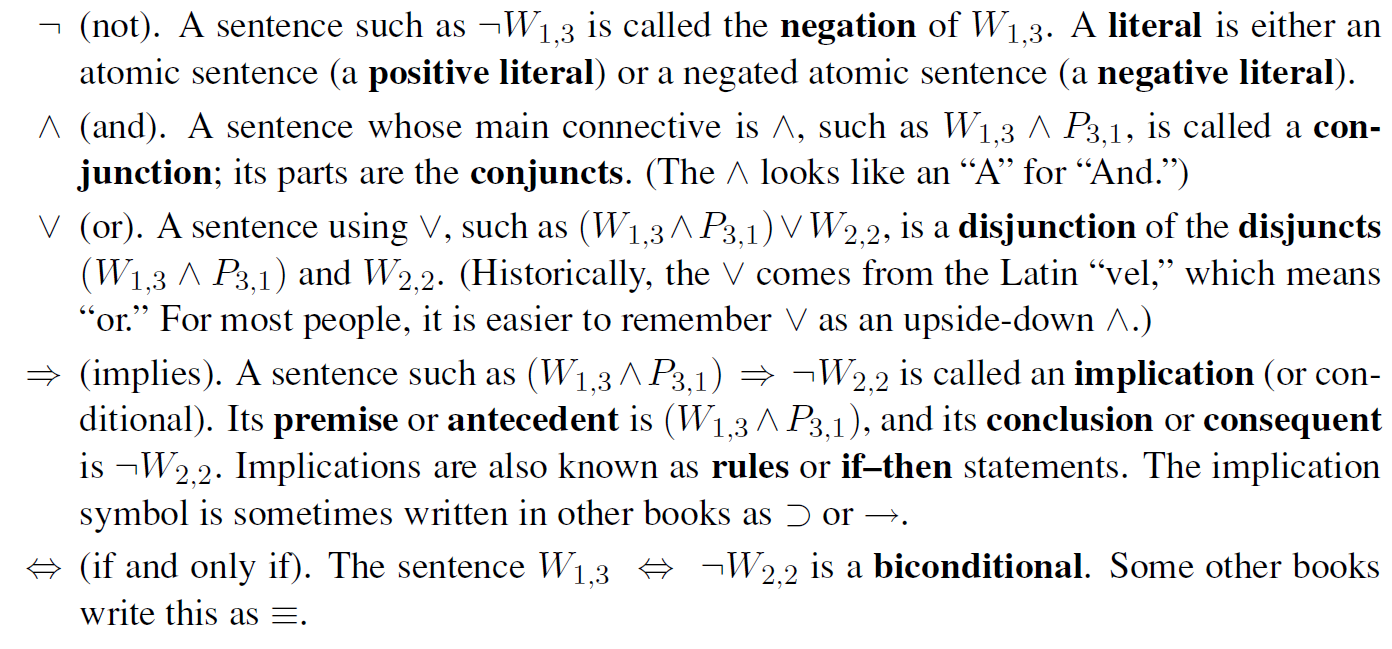

Remember, $\alpha \models \beta$ iff in very model in which $\alpha$ is true, $\beta$ is also true.

**Answers:**

**a.** A *valid* sentence is one that is true in all models. The sentence $True$ is also valid in all models. So if $\alpha$ is valid then the entailment holds (because both $True$ and $\alpha$ hold in every model), and if the entailment holds then $\alpha$ must be valid, because it must be true in all models, because it must be true in all models in which $True$ holds.

**b.** $False$ doesn't hold in any model, so $\alpha$ trivially holds in every model that $False$ holds in.

**c.** $\alpha \Rightarrow \beta$ holds in those models where $\beta$ holds or where $\neg\alpha$ holds. That is precisely the case if $\alpha \Rightarrow \beta$ is valid.

**d.** This follows from applying **c** in both directions.

**e.** This reduces to **c**, because $\alpha\wedge\neg\beta$ is unsatisfiable just when $\alpha \Rightarrow \beta$ is valid.

## 7.9 Using a method of your choice, verify each of the equivalences in Figure 7.11 (page 249).

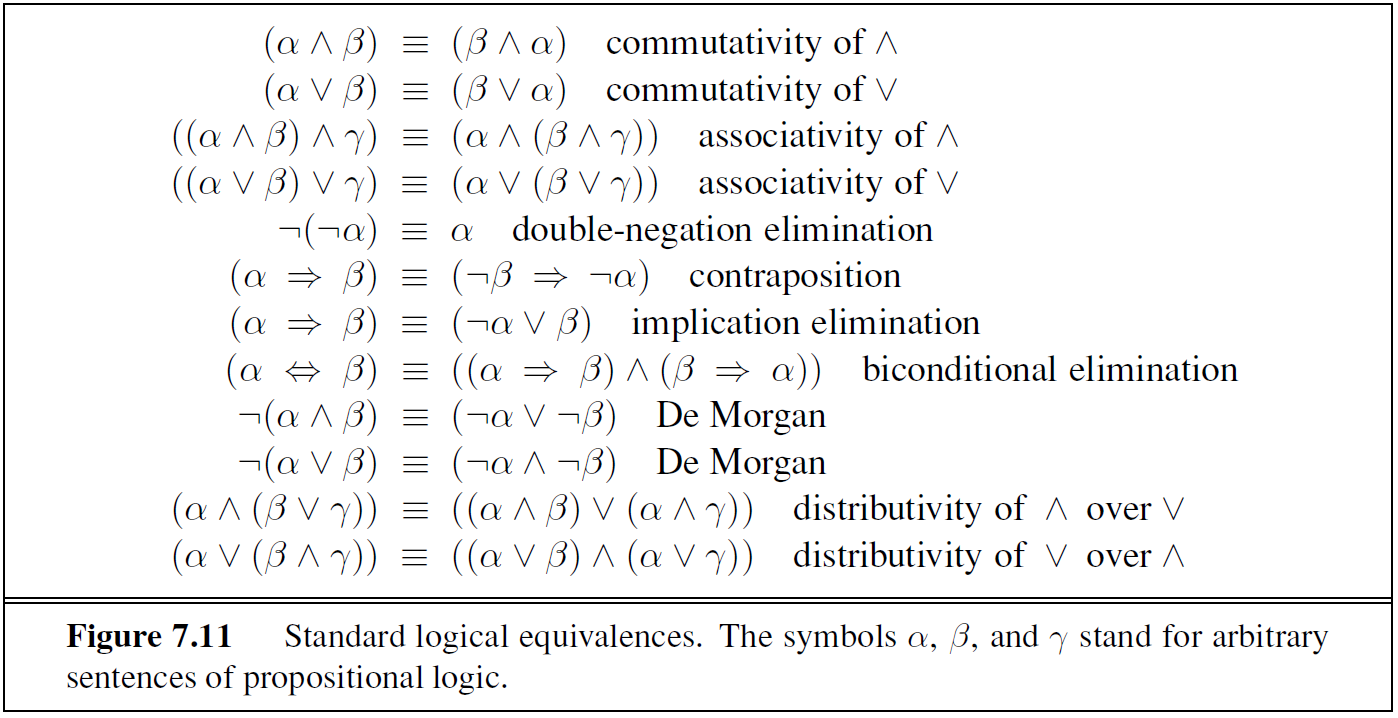

## Operators for Constructing Logical Sentences

Here is a table of the operators that can be used to form sentences. Note that we have a problem: we want to use Python operators to make sentences, so that our programs (and our interactive sessions like the one here) will show simple code. But Python does not allow implication arrows as operators, so for now we have to use a more verbose notation that Python does allow: |'==>'| instead of just ==>. Alternately, you can always use the more verbose Expr constructor forms:

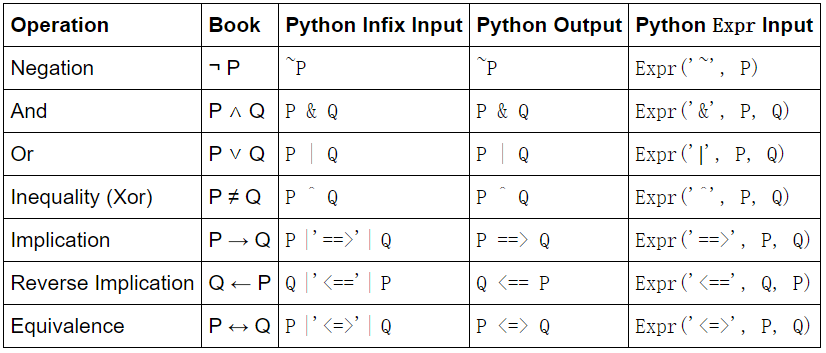

Now we can implement two algorithms `tt_entails` and `tt_check_all` in Figure 7.10 to verify each of the equivalences in Figure. 711. The pseudo-codes of `tt_entails` and `tt_check_all`are shown as follows:

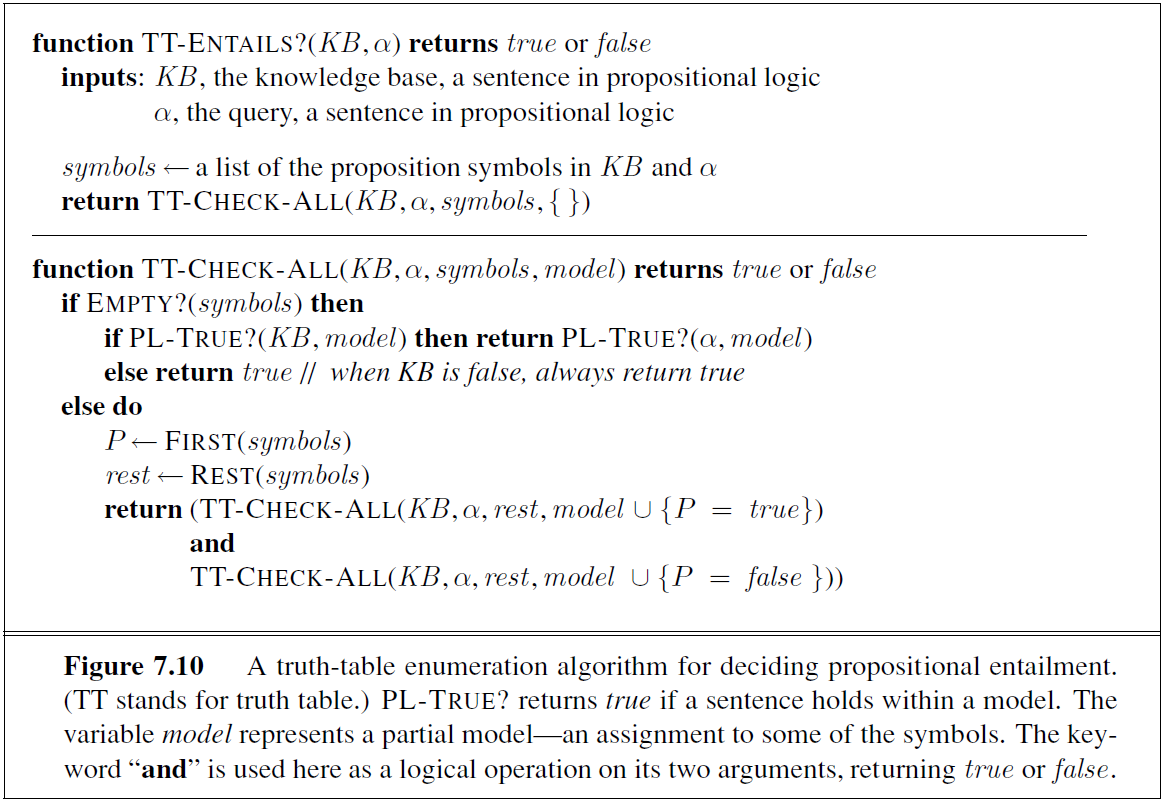

we will look at two algorithms to check if a sentence is entailed by the KB. Our goal is to decide whether $\text{KB} \vDash \alpha$ for some sentence $\alpha$.

## Truth Table Enumeration

It is a model-checking approach which, as the name suggests, enumerates all possible models in which the KB is true and checks if $\alpha$ is also true in these models. We list the $n$ symbols in the KB and enumerate the $2^{n}$ models in a depth-first manner and check the truth of KB and $\alpha$.


In [1]:
def tt_check_all(kb, alpha, symbols, model):
    """Auxiliary routine to implement tt_entails."""
    if not symbols:
        if pl_true(kb, model):
            result = pl_true(alpha, model)
            assert result in (True, False)
            return result
        else:
            return True
    else:
        P, rest = symbols[0], symbols[1:]
        return (tt_check_all(kb, alpha, rest, extend(model, P, True)) and
                tt_check_all(kb, alpha, rest, extend(model, P, False)))

The algorithm basically computes every line of the truth table $KB\implies \alpha$ and checks if it is true everywhere.
If symbols are defined, the routine recursively constructs every combination of truth values for the symbols and then, it checks whether model is consistent with kb. The given models correspond to the lines in the truth table, which have a true in the KB column, and for these lines it checks whether the query evaluates to true
result = pl_true(alpha, model).

In short, tt_check_all evaluates this logical expression for each model
pl_true(kb, model) => pl_true(alpha, model)
which is logically equivalent to
pl_true(kb, model) & ~pl_true(alpha, model)
that is, the knowledge base and the negation of the query are logically inconsistent.

tt_entails() just extracts the symbols from the query and calls tt_check_all() with the proper parameters.

In [2]:
def tt_entails(kb, alpha):
    """Does kb entail the sentence alpha? Use truth tables. For propositional
    kb's and sentences. [Figure 7.10]. Note that the 'kb' should be an
    Expr which is a conjunction of clauses.
    >>> tt_entails(expr('P & Q'), expr('Q'))
    True
    """
    assert not variables(alpha)
    symbols = list(prop_symbols(kb & alpha))
    return tt_check_all(kb, alpha, symbols, {})

Now we also need to implement related subfunctions to complete the whole framework.First, let's import the `utils` module which is attached. These functions in `utils` are used to provide basic features. Therefore, I will not describe them in detail.The functions `pl_true` and `prop_symbols` are elaborated as follows.

`pl_true`: evaluate a propositional logical sentence in a model.

`prop_symbols`: return the set of all propositional symbols.

In [3]:
from utils import Expr, expr, subexpressions, extend, is_variable, variables, is_symbol, is_prop_symbol

def pl_true(exp, model={}):
    """Return True if the propositional logic expression is true in the model,
    and False if it is false. If the model does not specify the value for
    every proposition, this may return None to indicate 'not obvious';
    this may happen even when the expression is tautological.
    >>> pl_true(P, {}) is None
    True
    """
    if exp in (True, False):
        return exp
    op, args = exp.op, exp.args
    if is_prop_symbol(op):
        return model.get(exp)
    elif op == '~':
        p = pl_true(args[0], model)
        if p is None:
            return None
        else:
            return not p
    elif op == '|':
        result = False
        for arg in args:
            p = pl_true(arg, model)
            if p is True:
                return True
            if p is None:
                result = None
        return result
    elif op == '&':
        result = True
        for arg in args:
            p = pl_true(arg, model)
            if p is False:
                return False
            if p is None:
                result = None
        return result
    p, q = args
    if op == '==>':
        return pl_true(~p | q, model)
    elif op == '<==':
        return pl_true(p | ~q, model)
    pt = pl_true(p, model)
    if pt is None:
        return None
    qt = pl_true(q, model)
    if qt is None:
        return None
    if op == '<=>':
        return pt == qt
    elif op == '^':  # xor or 'not equivalent'
        return pt != qt
    else:
        raise ValueError('Illegal operator in logic expression' + str(exp))
        
def prop_symbols(x):
    """Return the set of all propositional symbols in x."""
    if not isinstance(x, Expr):
        return set()
    elif is_prop_symbol(x.op):
        return {x}
    else:
        return {symbol for arg in x.args for symbol in prop_symbols(arg)}

Now we can start to verify each of the equivalences in Figure 7.11. Because of the lack of Greek letters in ASCII, we substitute P, Q, R for $\alpha$, $\beta$, $\gamma$.

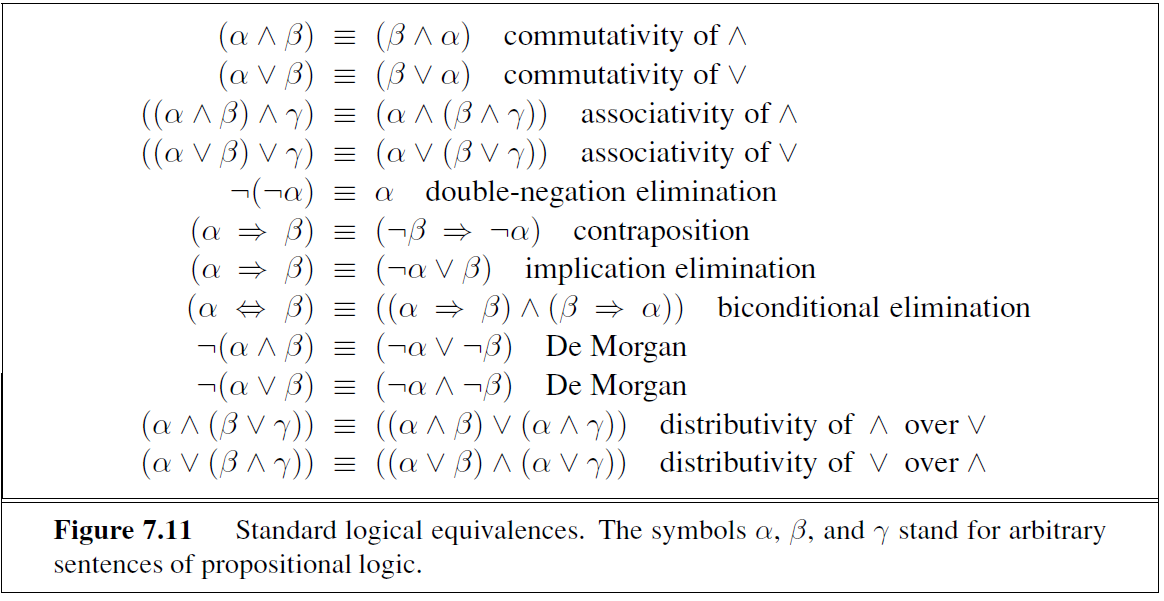

In [4]:
tt_entails(expr('P & Q'), expr('Q & P'))

True

In [5]:
tt_entails(expr('P | Q'), expr('Q | P'))

True

In [6]:
tt_entails(expr('(P & Q) & R'), expr('P & (Q & R)'))

True

In [7]:
tt_entails(expr('(P | Q) | R'), expr('P | (Q | R)'))

True

In [8]:
tt_entails(expr('~~P'), expr('P'))

True

In [9]:
tt_entails(expr('P ==> Q'), expr('~Q ==> ~P'))

True

In [10]:
tt_entails(expr('P ==> Q'), expr('~P | Q'))

True

In [11]:
tt_entails(expr('P <=> Q'), expr('(P ==> Q) & (Q ==>P)'))

True

In [12]:
tt_entails(expr('~(P & Q)'), expr('(~P | ~Q)'))

True

In [13]:
tt_entails(expr('~(P | Q)'), expr('(~P & ~Q)'))

True

In [14]:
tt_entails(expr('(P & (Q | R))'), expr('(P & Q) | (P & R)'))

True

In [15]:
tt_entails(expr('(P | (Q & R))'), expr('(P | Q) & (P | R)'))

True

## 7.22 
Minesweeper, the well-known computer game, is closely related to the wumpus world. A minesweeper world is a rectangular grid of N squares with M invisible mines scattered among them. Any square may be probed by the agent; instant death follows if a mine is probed. Minesweeper indicates the presence of mines by revealing, in each probed square, the number of mines that are directly or diagonally adjacent. The goal is to probe every unmined square.

**a.** Let $X_{i,j}$ be true iff square [i,j] contains a mine. Write down the assertion that exactly two mines are adjacent to [1,1] as a sentence involving some logical combination of $X_{i,j}$ propositions.

**answer:**  This is a disjunctionwith 28 disjuncts,each one saying that two of the neighbors are true and the others are false. The first disjunct is 
$X_{2,2}\wedge X_{1,2} \wedge \neg X_{0,2} \wedge \neg X_{0,1} \wedge \neg X_{2,1} \wedge \neg X_{0,0}\wedge \neg X_{1,0} \wedge \neg X_{2,0}$

The other 27 disjuncts each select two different $X_{i,j}$ to be  true.

**b.** Generalize your assertion from **(a)** by explaining how to construct a CNF sentence
asserting that $k$ of $n$ neighbors contain mines.

**answer:** There will be ${n \choose k}$ disjuncts, each saying that $k$ of the $n$ symbols are true and the others false.

**c.** Explain precisely how an agent can use DPLL to prove that a given square does (or
does not) contain a mine, ignoring the global constraint that there are exactly $M$ mines
in all.

**answer:** For each of the cells that have been probed, take the resulting number $n$ symbols are true and the others false.

**d.** Suppose that the global constraint is constructed from your method from part **(b)**. How does the number of clauses depend on $M$ and $N$? Suggest a way to modify DPLL so that the global constraint does not need to be represented explicitly.

**answer:** To encode the global constraint that there are $M$ mines altogether, we can construct a disjunct with ${M \choose N}$ disjuncts, each of size $N$. Remember, ${M \choose {N=M!/(M-N)!}}$. So for a Minesweeper game with 100 cells and 20 mines, this will be more than $10^{39}$, and thus cannot be represented in any computer. However, we can represent the global constraint within the DPLL algorithm itself. We add the parameter $\min$ and $\max$ to the DPLL function; these indicate the minimum and maximum number of unassigned symbols that must be true in the model. For an unconstrained problem the values 0 and $N$ will be used for these parameters. For a minesweeper problem the value $M$ will be used for both $\min$ and $\max$. Within DPLL, we fail (return false) immediately if $\min$ is less than the number of remaining symbols, or if $\max$ is less than 0. For each recursive call to DPLL, we update $\min$ and $\max$ by subtracting one when we assign a true value to a symbol.

**e.** Are any conclusions derived by the method in part (c) invalidated when the global
constraint is taken into account?

**answer:** No conclusions are invalidated by adding this capability to DPLL and encoding the global constraint using it.

**f.** Give examples of configurations of probe values that induce long-range dependencies such that the contents of a given unprobed square would give information about the contents of a far-distant square. (Hint: consider an N ×1 board.)

**answer:** COnsider this string of alternating 1's and unprobed cells (indicated by a dash):

| - |1| - |1| - |1| - |1| - |1| - |1| - |1| - |

There are two possible models: either there are mines under every even-numbered dash, or under every odd-numbered dash. Making a probe at either end will determine whether cells at the far end are empty or contain mines.

## References

- https://github.com/aimacode/aima-python

